In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
from matplotlib.animation import FuncAnimation
%matplotlib inline

In [2]:
import cufflinks as cf
cf.go_offline()

In [3]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [4]:
plotly.offline.init_notebook_mode(connected=True)

In [5]:
plt.rcParams['figure.figsize'] = (20, 6)
zhcn = FontProperties('simhei')
# de = FontProperties('DejaVu Sans')
sns.set_style('darkgrid')
sns.set_palette('rainbow')
# plt.rcParams['font.family'] = 'Noto Sans CJK SC'
plt.rcParams["animation.html"] = "jshtml"

## 读取歌曲数据

In [68]:
songs_info = pd.read_csv('all_songs_info.csv', index_col='song')
songs_info.head()

attached_pic album artist avg_frame_rate  bit_rate  bits_per_raw_sample  \
song                                                                            
可爱女人             1   Jay    周杰伦            0/0    321289                  8.0   
完美主义             1   Jay    周杰伦            0/0    321260                  8.0   
星晴               1   Jay    周杰伦            0/0    321188                  8.0   
娘子               1   Jay    周杰伦            0/0    321137                  8.0   
斗牛               1   Jay    周杰伦            0/0    321105                  8.0   

     channel_layout  channels chroma_location codec_long_name    ...     \
song                                                             ...      
可爱女人         stereo         2          center     Motion JPEG    ...      
完美主义         stereo         2          center     Motion JPEG    ...      
星晴           stereo         2          center     Motion JPEG    ...      
娘子           stereo         2          center     Motion JPEG    ...      
斗牛           stereo         2          center     Motion JPEG    ...      

     start_time time_base  width lyricist composer  \
song                                                 
可爱女人   0.025056   1/90000  445.0      徐若瑄      周杰伦   
完美主义   0.025056   1/90000  445.0      方文山      周杰伦   
星晴     0.025056   1/90000  445.0      周杰伦      周杰伦   
娘子     0.025056   1/90000  445.0      方文山      周杰伦   
斗牛     0.025056   1/90000  445.0      方文山      周杰伦   

                                                  lyric  arranger  \
song                                                                
可爱女人  作词：徐若瑄\r\r\n作曲：周杰伦\r\r\n编曲：周杰伦\r\r\n想要有直升机 想要和...       周杰伦   
完美主义  作词：方文山\r\r\n作曲：周杰伦\r\r\n编曲：洪敬尧\r\r\n如果说怀疑 可以造句...       洪敬尧   
星晴    作词：周杰伦\r\r\n作曲：周杰伦\r\r\n编曲：洪敬尧\r\r\n一步两步三步四步 望...       洪敬尧   
娘子    作词：方文山\r\r\n作曲：周杰伦\r\r\n编曲：周杰伦\r\r\n娘子 娘子却依旧每日...       周杰伦   
斗牛    作词：方文山\r\r\n作曲：周杰伦\r\r\n编曲：洪敬尧\r\r\n要不要挑一下 啊 挑...       洪敬尧   

     release_date distributor lyric_len  
song                                     
可爱女人   2000-11-06       阿尔发音乐       833  
完美主义   2000-11-06       阿尔发音乐       552  
星晴     2000-11-06       阿尔发音乐       649  
娘子     2000-11-06       阿尔发音乐       879  
斗牛     2000-11-06       阿尔发音乐       872  

[5 rows x 52 columns]

In [55]:
# def lyric_length(lyric):
#     if lyric is np.nan:
#         return 0
#     else:
#         return len(lyric)
    
# songs_info['lyric_len'] = songs_info.lyric.apply(lyric_length)

# songs_info.head(2)

attached_pic album artist avg_frame_rate  bit_rate  bits_per_raw_sample  \
song                                                                            
可爱女人             1   Jay    周杰伦            0/0    321289                  8.0   
完美主义             1   Jay    周杰伦            0/0    321260                  8.0   

     channel_layout  channels chroma_location codec_long_name    ...     \
song                                                             ...      
可爱女人         stereo         2          center     Motion JPEG    ...      
完美主义         stereo         2          center     Motion JPEG    ...      

     start_time time_base  width lyricist composer  \
song                                                 
可爱女人   0.025056   1/90000  445.0      徐若瑄      周杰伦   
完美主义   0.025056   1/90000  445.0      方文山      周杰伦   

                                                  lyric  arranger  \
song                                                                
可爱女人  作词：徐若瑄\r\n作曲：周杰伦\r\n编曲：周杰伦\r\n想要有直升机 想要和妳飞到宇宙去...       周杰伦   
完美主义  作词：方文山\r\n作曲：周杰伦\r\n编曲：洪敬尧\r\n如果说怀疑 可以造句 如果说分离...       洪敬尧   

     release_date distributor lyric_len  
song                                     
可爱女人   2000-11-06       阿尔发音乐       833  
完美主义   2000-11-06       阿尔发音乐       552  

[2 rows x 52 columns]

## 问题

- 歌曲时长及歌曲数量分布
- 各专辑的歌曲时长分布
- 各作词人的歌曲时长分布
- 各专辑内作词人分布
- 专辑发行日期分布，包括月份和日子
- 歌词长度分布
- 各作词人的歌词长度分布
- 作曲人分布（想都不用想都是我伦）
- 专辑发行公司分布
- 歌曲大小分布
- 比特率和采样率分布
- 歌名长度分布
- 歌词词嵌入

## 歌曲时长分布

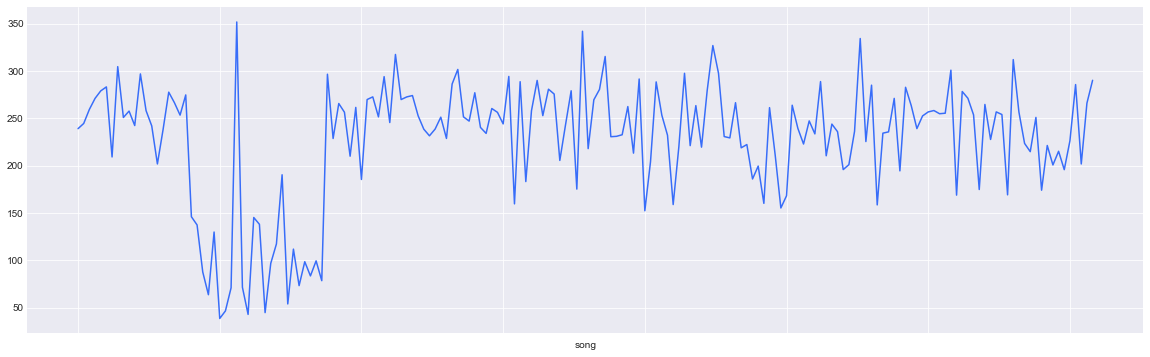

In [69]:
songs_info.duration.plot()

In [70]:
df = songs_info.duration.sort_values(ascending=False)
df.head()

song
情人的眼泪    351.768100
以父之名     341.972178
安静       334.288980
轨迹       326.847275
半岛铁盒     317.443200
Name: duration, dtype: float64

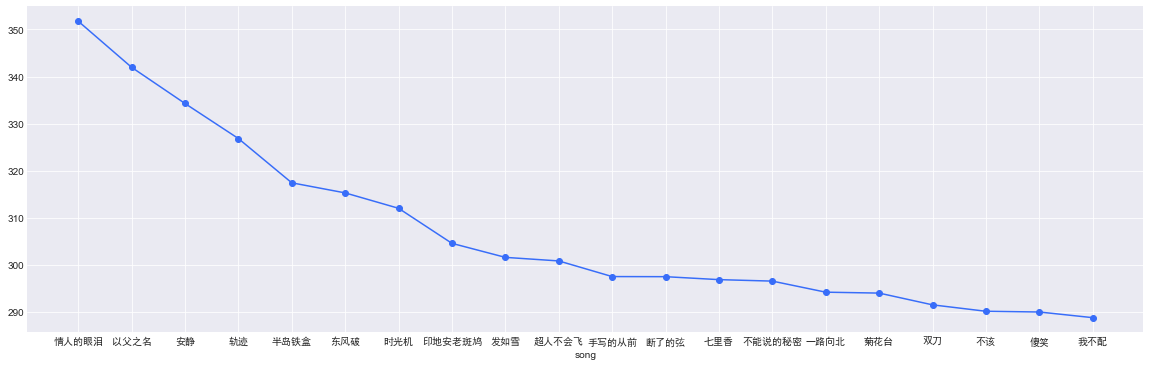

In [71]:
df.iloc[:20].plot(marker='o')
plt.xticks(range(20), df.index[:20], fontproperties=zhcn);

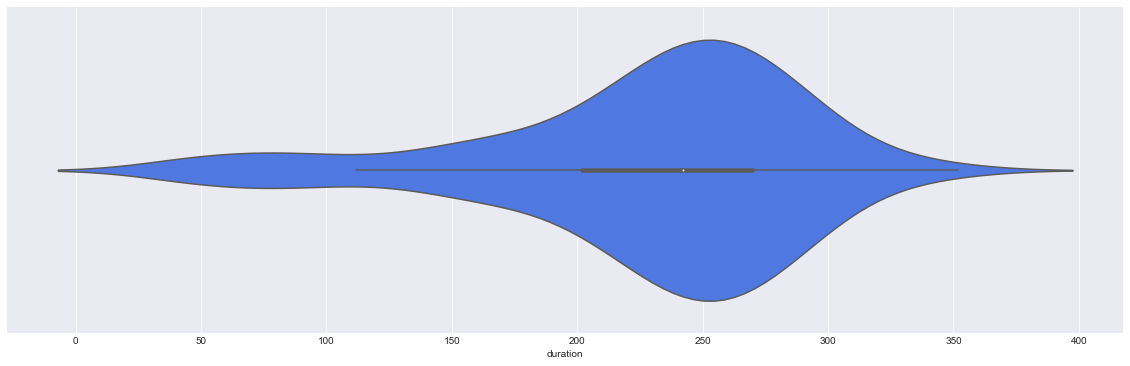

In [72]:
sns.violinplot(df)

In [73]:
with_lyrics = songs_info.loc[songs_info.lyric.notnull(), 'duration']
with_lyrics.head()

song
可爱女人    239.072653
完美主义    244.584490
星晴      259.448163
娘子      271.046531
斗牛      278.961633
Name: duration, dtype: float64

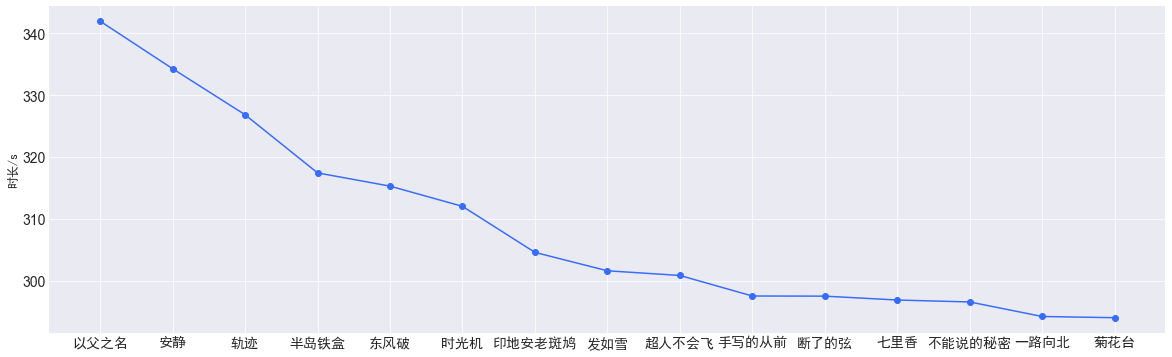

In [74]:
with_lyrics.sort_values(ascending=False, inplace=True)
fig = plt.figure()
with_lyrics[:15].plot(kind='line', marker='o')
plt.xticks(range(15), with_lyrics.index[:15], fontproperties=zhcn, fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('');
plt.ylabel('时长/s', fontproperties=zhcn, fontsize=12);

In [75]:
with_lyrics.shape

(154,)

In [76]:
with_lyrics.iplot(kind='scatter', theme='polar', title='周杰伦歌曲时长分布', mode='line', width=3)

In [77]:
with_lyrics.iloc[[0, -1]]

song
以父之名    341.972178
阳明山     152.346122
Name: duration, dtype: float64

In [78]:
songs_info.loc[['以父之名', '阳明山'], ['album', 'release_date', 'composer', 'lyricist', 'arranger']]

album release_date composer lyricist arranger
song                                                
以父之名     叶惠美   2003-07-29      周杰伦      黄俊郎      洪敬尧
阳明山   哎呦，不错哦   2014-12-26      周杰伦      方文山      林迈可

In [79]:
with_lyrics.max() - with_lyrics.min()

189.62605599999998

可以看到时间最长的是发行于 2003 年的叶惠美专辑中的《以父之名》，接近 6 分钟了（开头可真长），最短的则是发行于 2014 年的哎呦不错哦专辑中的《阳明山》，仅两分半。

## 各专辑的歌曲时长分布

In [80]:
album_gropued = songs_info.groupby('album')

In [81]:
albums_duration_stats = album_gropued.duration.agg([len, np.mean, np.std, lambda g: g.max()-g.min()])
albums_duration_stats.columns = ['len', 'mean', 'std', 'range']
albums_duration_stats

len        mean        std       range
album                                            
11月的萧邦    12.0  260.143599  24.156713   72.855500
Jay       10.0  259.866122  26.563718   95.373061
七里香       10.0  255.156822  26.334084   95.059600
不能说的秘密    25.0  112.626474  74.772824  313.155922
依然范特西     10.0  249.576800  32.467301  108.600000
八度空间      10.0  259.213645  25.412407   85.916744
十二新作      12.0  240.968708  47.558983  130.351021
叶惠美       11.0  262.426944  41.988710  128.731422
周杰伦的床边故事  10.0  227.701551  39.748755  116.088163
哎呦，不错哦    12.0  232.502857  46.749408  145.188572
寻找周杰伦EP    2.0  312.179512  20.743349   29.335525
惊叹号       11.0  212.827997  35.955542  111.180343
我很忙       10.0  235.418122  31.946500  120.581225
范特西       10.0  237.756082  49.671230  175.725715
跨时代       11.0  247.945332  37.073527  131.973823
霍元甲EP      1.0  278.311750        NaN    0.000000
魔杰座       11.0  242.190723  41.643094  142.837551
黄金甲EP      2.0  232.884825  25.564350   36.153450

In [82]:
albums_info = pd.read_csv('album_info.csv', parse_dates=['date'], index_col='album')
albums_info.head()

date distributor
album                        
11月的萧邦 2005-11-01       杰威尔音乐
七里香    2004-08-03       杰威尔音乐
不能说的秘密 2007-08-13    ALFA(亚津)
依然范特西  2006-09-05       杰威尔音乐
八度空间   2002-07-18     阿尔发/Bmg

Text(0,0.5,'时长/s')

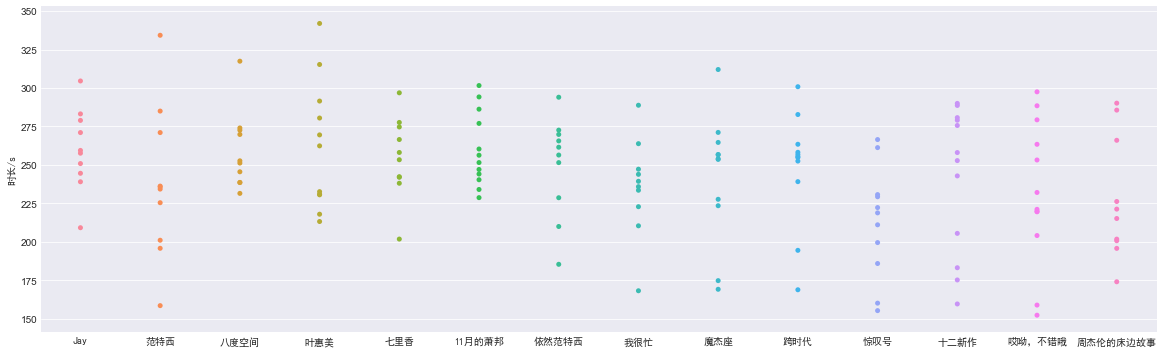

In [83]:
# 按照发行日期排序
fig = plt.figure()
exclude_albums = ['不能说的秘密', '黄金甲EP', '霍元甲EP', '寻找周杰伦EP']
order = albums_info[~albums_info.index.isin(exclude_albums)].sort_values(by='date').index

sns.stripplot(x='album', y='duration', data=songs_info.loc[~songs_info.album.isin(exclude_albums)], order=order)
plt.xticks(fontproperties=zhcn)
plt.xlabel('')
plt.ylabel('时长/s', fontproperties=zhcn)

In [84]:
data = [go.Box(y=album_gropued.get_group(g).duration, name=g) for g in order]
layout = go.Layout(title='周杰伦各专辑歌曲时长分布')
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [85]:
albums_duration_stats = albums_duration_stats.loc[order]
albums_duration_stats.head()

len        mean        std       range
album                                         
Jay    10.0  259.866122  26.563718   95.373061
范特西    10.0  237.756082  49.671230  175.725715
八度空间   10.0  259.213645  25.412407   85.916744
叶惠美    11.0  262.426944  41.988710  128.731422
七里香    10.0  255.156822  26.334084   95.059600

In [86]:
albums_duration_stats.sort_values(by='len', ascending=False)['len'].iplot(title='周杰伦各专辑内歌曲数量', yTitle='歌曲数量', mode='line+marker', theme='solar')

In [87]:
albums_duration_stats.sort_values(by='mean', ascending=False)['mean'].iplot(title='周杰伦各专辑内歌曲的平均时长', yTitle='时长/s', mode='line+marker', theme='solar')

In [88]:
albums_duration_stats.sort_values(by='std', ascending=False)['std'].iplot(title='周杰伦各专辑歌曲时长波动大小', yTitle='标准差', mode='line+marker', theme='solar')

In [89]:
albums_duration_stats.sort_values(by='range', ascending=False)['range'].iplot(title='周杰伦各专辑歌曲时长极差', yTitle='极差', mode='line+marker', theme='solar')

In [90]:
albums_duration_stats['len'].iplot(title='周杰伦各专辑内歌曲数量（按照发行时间排序）', yTitle='歌曲数量', mode='line+marker', theme='solar')

In [91]:
albums_duration_stats['mean'].iplot(title='周杰伦各专辑内歌曲的平均时长（按照发行时间排序）', yTitle='时长/s', mode='line+marker', theme='solar')

In [92]:
albums_duration_stats['range'].iplot(title='周杰伦各专辑歌曲时长极差（按照发行时间排序）', yTitle='极差', mode='line+marker', theme='solar')

In [93]:
albums_duration_stats['std'].iplot(title='周杰伦各专辑歌曲时长波动大小（按照发行时间排序）', yTitle='标准差', mode='line+marker', theme='solar')

## 各作词人的歌曲时长分布

In [94]:
lyricist_duration = songs_info.groupby(by='lyricist')

In [95]:
lyricist_duration.duration.agg(np.mean).iplot(title='作词人歌曲平均时长分布', yTitle='歌曲时长平均值', mode='line+marker', theme='solar')

In [96]:
lyricist_duration.duration.agg(len).iplot(title='作词人歌曲数量分布', yTitle='歌曲数量', mode='line+marker', theme='solar')

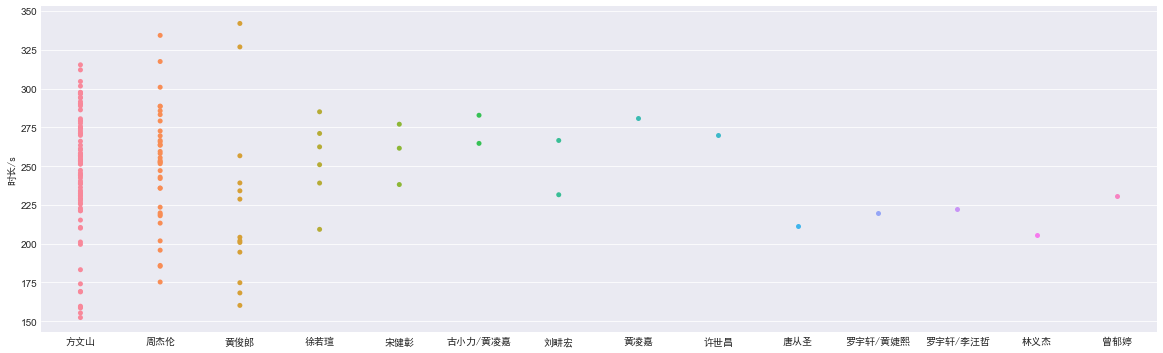

In [97]:
order = songs_info.lyricist.value_counts().index
sns.stripplot(x='lyricist', y='duration', data=songs_info, order=order)
plt.xticks(range(len(order)), order, fontproperties=zhcn);
plt.xlabel('')
plt.ylabel('时长/s', fontproperties=zhcn);

In [98]:
data = [go.Box(y=lyricist_duration.get_group(g).duration, name=g) for g in order]
layout = go.Layout(title='各作词人歌曲时长分布', yaxis={'title': '时长/s'})
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

## 各专辑内作词人分布

In [99]:
album_lyricist = pd.crosstab(songs_info.album, songs_info.lyricist)
album_lyricist = album_lyricist.loc[~album_lyricist.index.isin(exclude_albums)]
album_lyricist = album_lyricist.loc[albums_duration_stats.index]
album_lyricist.head()

lyricist  刘畊宏  古小力/黄凌嘉  周杰伦  唐从圣  宋健彰  徐若瑄  方文山  曾郁婷  林义杰  罗宇轩/李汪哲  罗宇轩/黄婕熙  \
album                                                                         
Jay         0        0    2    0    0    3    5    0    0        0        0   
范特西         0        0    2    0    0    2    5    0    0        0        0   
八度空间        1        0    2    0    0    0    6    0    0        0        0   
叶惠美         0        0    3    0    0    1    5    1    0        0        0   
七里香         1        0    2    0    1    0    5    0    0        0        0   

lyricist  许世昌  黄俊郎  黄凌嘉  
album                    
Jay         0    0    0  
范特西         0    0    0  
八度空间        1    0    0  
叶惠美         0    1    0  
七里香         0    1    0

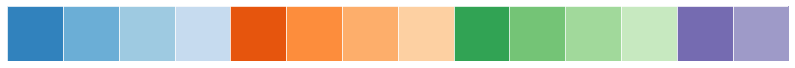

In [100]:
color_list = sns.color_palette('tab20c', 14)
sns.palplot(color_list)

In [101]:
for col, color in zip(album_lyricist.columns, color_list):
    print(col, color)

刘畊宏 (0.19215686274509805, 0.5098039215686274, 0.7411764705882353)
古小力/黄凌嘉 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098)
周杰伦 (0.6196078431372549, 0.792156862745098, 0.8823529411764706)
唐从圣 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843)
宋健彰 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744)
徐若瑄 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882)
方文山 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549)
曾郁婷 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588)
林义杰 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235)
罗宇轩/李汪哲 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157)
罗宇轩/黄婕熙 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019)
许世昌 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882)
黄俊郎 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235)
黄凌嘉 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961)


In [102]:
data = [go.Bar(x=album_lyricist.index, y=album_lyricist.loc[:, col], name=col, marker=dict(color=f'rgb{color}')) 
        for col, color in zip(album_lyricist.columns, color_list)]
layout = go.Layout(barmode='stack')
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

综合来看，方文山、周杰伦和黄俊郎是所有专辑中的三大作词人。

## 专辑发行日期分布，包括月份和日子

In [103]:
songs_info.columns

Index(['attached_pic', 'album', 'artist', 'avg_frame_rate', 'bit_rate',
       'bits_per_raw_sample', 'channel_layout', 'channels', 'chroma_location',
       'codec_long_name', 'codec_name', 'codec_tag', 'codec_tag_string',
       'codec_time_base', 'codec_type', 'coded_height', 'coded_width',
       'color_primaries', 'color_range', 'color_space', 'color_transfer',
       'display_aspect_ratio', 'duration', 'duration_ts', 'field_order',
       'filename', 'format_long_name', 'format_name', 'has_b_frames', 'height',
       'index', 'level', 'nb_streams', 'pix_fmt', 'probe_score', 'profile',
       'r_frame_rate', 'refs', 'sample_aspect_ratio', 'sample_fmt',
       'sample_rate', 'size', 'start_time', 'time_base', 'width', 'lyricist',
       'composer', 'lyric', 'arranger', 'release_date', 'distributor',
       'lyric_len'],
      dtype='object')

In [104]:
albums_duration_stats.head()

len        mean        std       range
album                                         
Jay    10.0  259.866122  26.563718   95.373061
范特西    10.0  237.756082  49.671230  175.725715
八度空间   10.0  259.213645  25.412407   85.916744
叶惠美    11.0  262.426944  41.988710  128.731422
七里香    10.0  255.156822  26.334084   95.059600

In [105]:
# albums_duration_stats.plot(kind='scatter', x='mean', y='std', s=albums_duration_stats.range)

In [106]:
# colors = sns.color_palette('rainbow', len(albums_duration_stats))
# c = zip(albums_duration_stats.index, colors)

# plt.scatter(albums_duration_stats['mean'], 
#             albums_duration_stats['std'], 
#             s=albums_duration_stats.range, 
#             c=colors,
#             alpha=1)
# plt.legend(albums_duration_stats.index)

# colors = sns.color_palette('rainbow', len(albums_duration_stats))
# c = zip(albums_duration_stats.index, colors)

# fig, ax = plt.subplots()
# for album, color in c:
# #     print(album, color)
#     ax.scatter(albums_duration_stats.loc[album, 'mean'], 
#                 albums_duration_stats.loc[album, 'std'], 
#                 s=albums_duration_stats.loc[album, 'range'], 
#                 c=color,
#                 alpha=1,
#                 label=album)
# legd = ax.legend(prop=zhcn, ncol=2, bbox_to_anchor=(1.2, 0.5), loc='center right')
# for handle in legd.legendHandles:
#     handle.set_sizes(50.0)

In [107]:
dates = [albums_info.loc[idx, 'date'] for idx in albums_duration_stats.index]
dates

[Timestamp('2000-11-06 00:00:00'),
 Timestamp('2001-09-14 00:00:00'),
 Timestamp('2002-07-18 00:00:00'),
 Timestamp('2003-07-29 00:00:00'),
 Timestamp('2004-08-03 00:00:00'),
 Timestamp('2005-11-01 00:00:00'),
 Timestamp('2006-09-05 00:00:00'),
 Timestamp('2007-11-01 00:00:00'),
 Timestamp('2008-10-14 00:00:00'),
 Timestamp('2010-05-18 00:00:00'),
 Timestamp('2011-11-11 00:00:00'),
 Timestamp('2012-12-28 00:00:00'),
 Timestamp('2014-12-26 00:00:00'),
 Timestamp('2016-06-24 00:00:00')]

In [108]:
albums_info

date distributor
album                          
11月的萧邦   2005-11-01       杰威尔音乐
七里香      2004-08-03       杰威尔音乐
不能说的秘密   2007-08-13    ALFA(亚津)
依然范特西    2006-09-05       杰威尔音乐
八度空间     2002-07-18     阿尔发/Bmg
十二新作     2012-12-28       杰威尔音乐
叶惠美      2003-07-29       杰威尔音乐
周杰伦的床边故事 2016-06-24       杰威尔音乐
哎呦，不错哦   2014-12-26       杰威尔音乐
寻找周杰伦EP  2003-11-11       杰威尔音乐
惊叹号      2011-11-11       杰威尔音乐
我很忙      2007-11-01       杰威尔音乐
Jay      2000-11-06       阿尔发音乐
范特西      2001-09-14     阿尔发/Bmg
跨时代      2010-05-18  SONY MUSIC
魔杰座      2008-10-14       杰威尔音乐
霍元甲EP    2006-01-20  SONY MUSIC
黄金甲EP    2006-12-07  SONY MUSIC

In [109]:
albums_info_cleaned = albums_info.loc[albums_duration_stats.index]
albums_info_cleaned['year'] = albums_info_cleaned.date.dt.year
albums_info_cleaned['month'] = albums_info_cleaned.date.dt.month
albums_info_cleaned['day'] = albums_info_cleaned.date.dt.day
albums_info_cleaned

date distributor  year  month  day
album                                            
Jay      2000-11-06       阿尔发音乐  2000     11    6
范特西      2001-09-14     阿尔发/Bmg  2001      9   14
八度空间     2002-07-18     阿尔发/Bmg  2002      7   18
叶惠美      2003-07-29       杰威尔音乐  2003      7   29
七里香      2004-08-03       杰威尔音乐  2004      8    3
11月的萧邦   2005-11-01       杰威尔音乐  2005     11    1
依然范特西    2006-09-05       杰威尔音乐  2006      9    5
我很忙      2007-11-01       杰威尔音乐  2007     11    1
魔杰座      2008-10-14       杰威尔音乐  2008     10   14
跨时代      2010-05-18  SONY MUSIC  2010      5   18
惊叹号      2011-11-11       杰威尔音乐  2011     11   11
十二新作     2012-12-28       杰威尔音乐  2012     12   28
哎呦，不错哦   2014-12-26       杰威尔音乐  2014     12   26
周杰伦的床边故事 2016-06-24       杰威尔音乐  2016      6   24

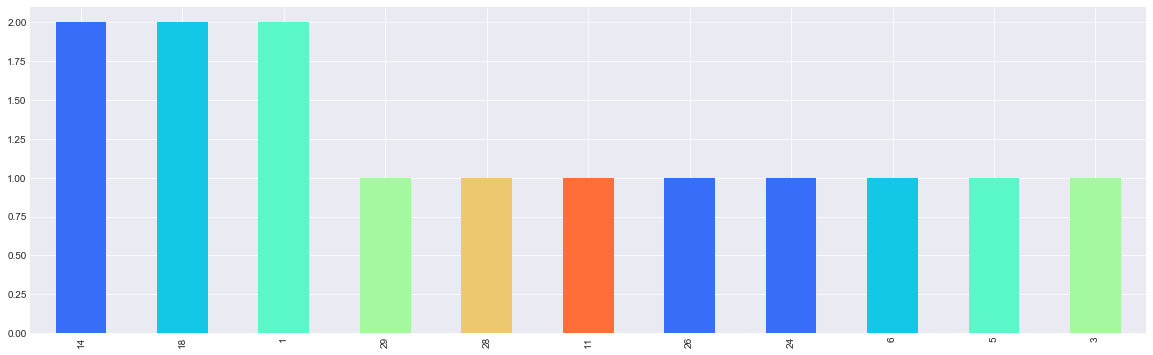

In [110]:
albums_info_cleaned.day.value_counts().plot(kind='bar')

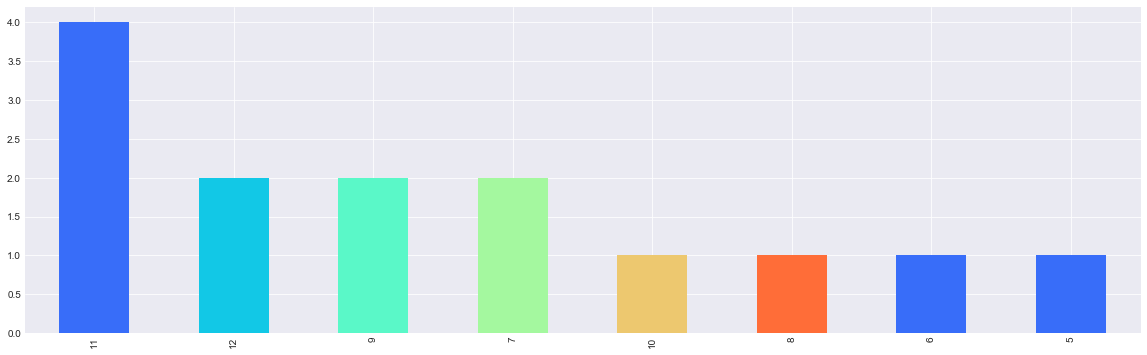

In [111]:
albums_info_cleaned.month.value_counts().plot(kind='bar')

## 歌词长度分布

In [112]:
# album_lyric_stats.head()

In [113]:
album_gropued.lyric_len.get_group('范特西')

song
上海 一九四三    293
双截棍        503
威廉古堡       376
安静         898
对不起        282
开不了口       313
忍者         334
爱在西元前      345
爸我回来了      514
简单爱        327
Name: lyric_len, dtype: int64

In [67]:
# 补充《上海 一九四三》的歌词
# sh_lyric = '''
# 作词：方文山
# 作曲：周杰伦
# 编曲：迈可林

# 泛黄的春联还残留在墙上
# 依稀可见几个字岁岁平安
# 在我没回去过的老家米缸
# 爷爷用楷书写一个满

# 黄金葛爬满了雕花的门窗
# 夕阳斜斜映在斑驳的砖墙
# 铺着榉木板的屋内还弥漫
# 姥姥当年酿的豆瓣酱

# 我对着黑白照片开始想像
# 更多更详尽歌词 在 ※ Mojim.com　魔镜歌词网 
# 爸和妈当年的模样
# 说著一口吴侬软语的姑娘缓缓走过外滩

# 消失的　旧时光　一九四三
# 在回忆　的路上　时间变好慢
# 老街坊　小弄堂
# 是属于那年代白墙黑瓦的淡淡的忧伤

# 消失的　旧时光　一九四三
# 回头看　的片段　有一些风霜
# 老唱盘　旧皮箱
# 装满了明信片的铁盒里藏着一片玫瑰花瓣
# '''
# songs_info.loc['上海 一九四三', 'lyric'] = sh_lyric
# songs_info.loc['上海 一九四三', 'lyric_len'] = len(sh_lyric)
# songs_info.to_csv('all_songs_info.csv', index=True)

In [116]:
order = albums_duration_stats.index
data = [go.Box(y=album_gropued.get_group(g).lyric_len, name=g) for g in order]
layout = go.Layout(title='周杰伦各专辑歌曲歌词长度分布')
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [126]:
songs_info.loc[songs_info.lyric_len != 0].lyric_len.iplot(kind='box', title='周杰伦所有歌曲歌词长度分布')

## 各作词人的歌词长度分布

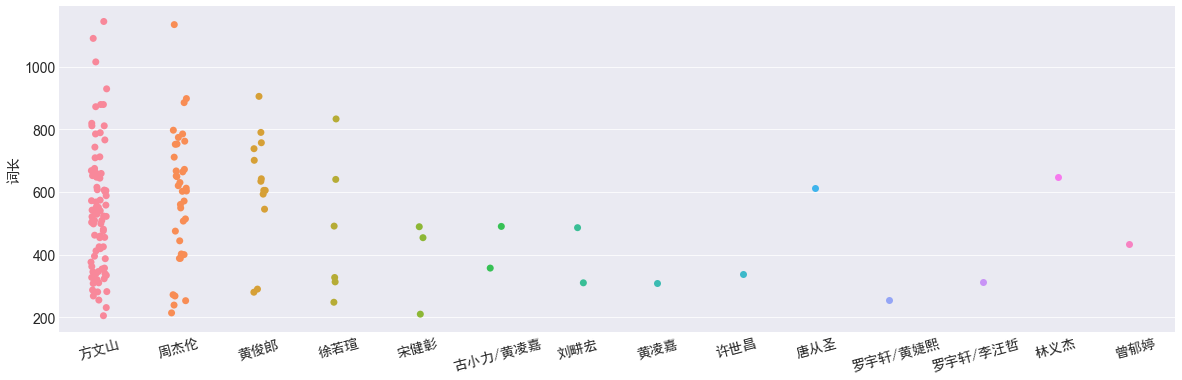

In [135]:
# 作词人与歌词长度
order = songs_info.lyricist.value_counts().index
sns.stripplot(x='lyricist', y='lyric_len', data=songs_info, order=order, jitter=True, size=7)
plt.xticks(range(len(order)), order, fontproperties=zhcn, fontsize=14, rotation=15);
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('词长', fontproperties=zhcn, fontsize=14);

## 作曲人分布

In [141]:
songs_info.composer.value_counts().iplot(title='周杰伦歌曲作曲人分布🤣')

🤣

## 编曲人分布

In [143]:
songs_info.arranger.value_counts().iplot(title='周杰伦歌曲编曲人分布', mode='line+marker')

## 专辑发行公司分布

In [146]:
songs_info.distributor.value_counts().iplot(title='周杰伦歌曲发行公司分布', mode='line+marker')

## 歌曲大小分布

In [152]:
songs_info['size'].iplot(kind='hist', title='周杰伦歌曲大小分布')

## 比特率和采样率分布

In [160]:
songs_info.bit_rate.iplot(kind='box', title='周杰伦歌曲比特率分布')

In [169]:
songs_info.sample_rate.value_counts().iplot(kind='bar', title='周杰伦歌曲采样率分布')

## 歌名长度分布

In [175]:
title_len = pd.Series(list(map(len, songs_info.index)), index=songs_info.index)
title_len

song
可爱女人               4
完美主义               4
星晴                 2
娘子                 2
斗牛                 2
黑色幽默               4
伊斯坦堡               4
印地安老斑鸠             6
龙卷风                3
反方向的钟              5
我的地盘               4
七里香                3
借口                 2
外婆                 2
将军                 2
搁浅                 2
乱舞春秋               4
困兽之斗               4
园游会                3
止战之殇               4
Opening            7
脚踏车                3
早操                 2
淡水海边               4
斗琴                 2
湘伦小雨四手联弹           8
Ride With Me      12
父与子                3
情人的眼泪              5
First Kiss        10
                  ..
雨下一整晚              5
我落泪情绪零碎            7
爱的飞行日记             6
自导自演               4
超人不会飞              5
嘻哈空姐               4
霍元甲                3
龙战骑士               4
给我一首歌的时间           8
蛇舞                 2
花海                 2
魔术先生               4
说好的幸福呢             6
兰亭序                3
流浪诗人               4
时光机                3
乔克叔叔    

In [176]:
title_len.iplot()

In [177]:
title_len.iplot(kind='box')

In [181]:
# songs_info.loc[songs_info.lyric_len != 0]
title_len_clean = pd.Series(songs_info.loc[songs_info.lyric_len != 0].index.map(len), index=songs_info.loc[songs_info.lyric_len != 0].index)
title_len_clean.iplot()

In [182]:
title_len_clean.iplot(kind='box')

In [183]:
title_len_clean.describe()

count    154.000000
mean       3.779221
std        1.641961
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max       14.000000
Name: song, dtype: float64